In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, time

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(xtrain,ytrain),(xtest,ytest) = datasets.cifar10.load_data()

In [3]:
xtrain.shape

(50000, 32, 32, 3)

In [4]:
ytrain.shape

(50000, 1)

In [5]:
xtest.shape

(10000, 32, 32, 3)

In [6]:
ytest.shape

(10000, 1)

In [7]:
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
ytrain = ytrain.reshape(-1,)

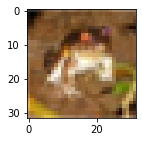

In [9]:
plt.figure(figsize=(12,2))
plt.imshow(xtrain[0])

In [10]:
# normalize images
xtrain = xtrain/255
xtrain

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
# cnn
cnn = models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [12]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 52s 32ms/step - loss: 1.6247 - accuracy: 0.4043
Epoch 2/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3249 - accuracy: 0.5276
Epoch 3/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1949 - accuracy: 0.5753
Epoch 4/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1129 - accuracy: 0.6065
Epoch 5/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0586 - accuracy: 0.6293
Epoch 6/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0211 - accuracy: 0.6418
Epoch 7/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9753 - accuracy: 0.6548
Epoch 8/20
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9402 - accuracy: 0.6689
Epoch 9/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9106 - accuracy: 0.6803
Epoch 10/20
1563/1563 [==============================] - 50s 32m

In [14]:
ytest = ytest.reshape(-1,)
ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [15]:
cnn.evaluate(xtest,ytest)

313/313 [==============================] - 3s 8ms/step - loss: 180.9363 - accuracy: 0.3905


[180.93634033203125, 0.390500009059906]

In [16]:
cnn=models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 51s 32ms/step - loss: 1.5698 - accuracy: 0.4263
Epoch 2/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2486 - accuracy: 0.5553
Epoch 3/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1373 - accuracy: 0.5985
Epoch 4/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0701 - accuracy: 0.6238
Epoch 5/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0090 - accuracy: 0.6437
Epoch 6/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9671 - accuracy: 0.6597
Epoch 7/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9267 - accuracy: 0.6734
Epoch 8/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8965 - accuracy: 0.6844
Epoch 9/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8685 - accuracy: 0.6936
Epoch 10/20
1563/1563 [==============================] - 50s 32m

In [19]:
cnn.evaluate(xtest/255,ytest.reshape(-1,))

313/313 [==============================] - 3s 8ms/step - loss: 0.8513 - accuracy: 0.7051


[0.8513100743293762, 0.7050999999046326]